In [155]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
#from jupyterthemes import jtplot
#jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)
sns.set_style('whitegrid')

threshold = 15
blob_size_key = 'All'
N = 15
num_frames = 18481
dat = []
num = np.zeros(num_frames)
numpixels = []
for i in range(N):
    D = pd.read_csv('/home/sultannazir/Videos/data/T{}_{}/T{}_{}_fish{}.csv'.format(threshold,blob_size_key,threshold,blob_size_key,i))
    # slice out frames with tracking for more that 1 consecutive frames
    frames = len(D)
    slices = []
    empty_seg_lens = []
    key = 0
    j=0
    while j<frames:
        if D.iloc[j]['X (cm)']==np.inf: # identify frame without tracking
            if key==1:                  # if previous frame was new slice, not more than 1 consecutive frame. Delete slice
                del slices[-1]
                empty_seg_lens.append(1)
            elif key==2:
                empty_seg_lens.append(1)
            else:
                empty_seg_lens[-1]+=1
            key=0
        else:
            numpixels.append(D.iloc[j]['num_pixels'])
            num[j]+=1
            if key==0:                 # If prev frame had no tracking, begin new slice
                slices.append([])
                slices[-1].append(D.iloc[j])
                key=1
            else:                      # If prev frame had tracking, add data to same slice
                slices[-1].append(D.iloc[j])
                key=2
        j+=1
        
    for sl in slices:
        dat.append(pd.DataFrame(sl))

# num individuals list = num
# lengths of segments without tracking = empty_seg_lens
# pixel sizes of fish = numpixels

11.32611871651967 2.3963297433650337


(-1.0, 16.0)

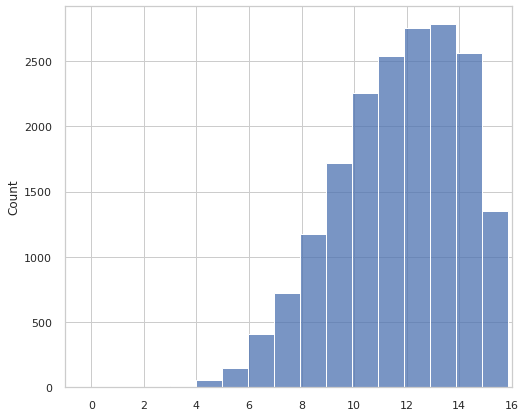

In [156]:
print(statistics.mean(num), statistics.stdev(num))
sns.histplot(num, binwidth=0.99)
plt.xlim([-1,16])

5.332989690721649 4.704415106714292


(0.0, 160.0)

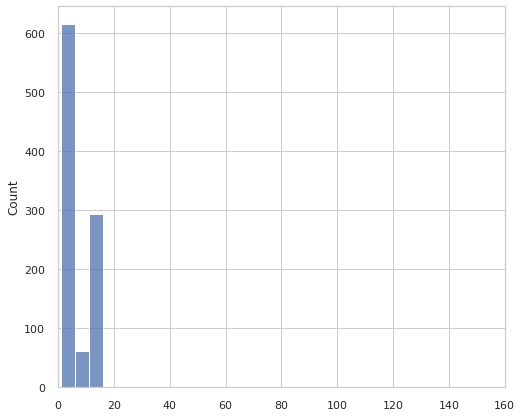

In [157]:
print(statistics.mean(empty_seg_lens), statistics.stdev(empty_seg_lens))
p = sns.histplot(empty_seg_lens, binwidth=5)
#p.set_yscale('log')
plt.xlim([0,160])

262.9400099370336 500.5040731827594


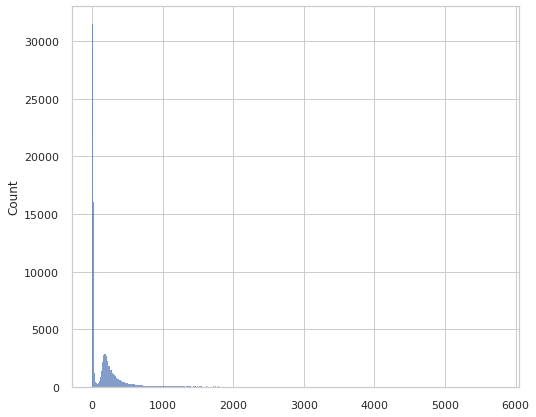

In [158]:
print(statistics.mean(numpixels), statistics.stdev(numpixels))
p = sns.histplot(numpixels,binwidth=5)
#plt.xlim([0,500])

(0.0, 1.0)

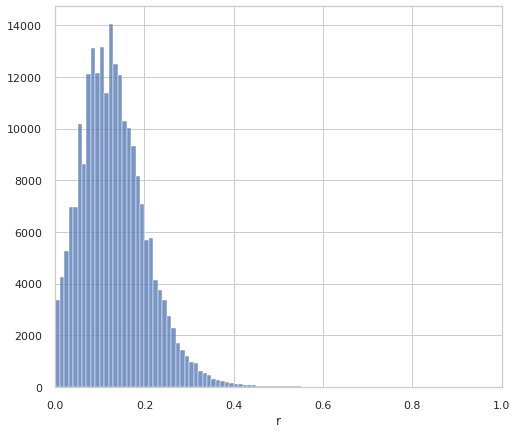

In [152]:
# Read step sizes and x,y components

steps = []
dxdat = []
dydat = []
for i in range(len(dat)):
    dx = dat[i]['X#wcentroid (cm)'][1:].values - dat[i]['X#wcentroid (cm)'][:-1].values
    dy = dat[i]['Y#wcentroid (cm)'][1:].values - dat[i]['Y#wcentroid (cm)'][:-1].values
    step = (dx**2 + dy**2)**0.5
    steps = steps + step.tolist()
    dxdat = dxdat + dx.tolist()
    dydat = dydat + dy.tolist()

    # plot histogram of step sizes in log scale count
sns.set_style('whitegrid')
p = sns.histplot(steps, binwidth=0.01)
#p.set_ylim(0.8,10000)
#p.set_yscale('log')
plt.xlabel('r')
plt.ylabel('')
#plt.title('Distribution of step sizes taken by fish in one time step (0.04s)')
plt.xlim([0,1])

In [153]:
orixdat = []
oriydat = []
for i in range(len(dat)):
    orix = dat[i]['X (cm)'][:-1].values - dat[i]['X#wcentroid (cm)'][:-1].values
    oriy = dat[i]['Y (cm)'][:-1].values -  dat[i]['Y#wcentroid (cm)'][:-1].values
    orixdat = orixdat + orix.tolist()
    oriydat = oriydat + oriy.tolist()
#orixu = orix/(orix**2+oriy**2)**0.5
#oriyu = oriy/(orix**2+oriy**2)**0.5

angles = []
xx = []
yy = []
for i in range(len(orixdat)):
    ang = math.atan2(dydat[i],dxdat[i]) - math.atan2(oriydat[i],orixdat[i])
    if abs(ang)>math.pi:
        if ang<0:
            ang=2*math.pi+ang
        else:
            ang=ang-2*math.pi
    angles.append(ang)
    xx.append(steps[i]*math.cos(ang))
    yy.append(steps[i]*math.sin(ang))

#sns.histplot(np.array(angles)*180/math.pi)
#sns.set_theme()
#plt.scatter(xx,yy,alpha=0.1)
#plt.xlim([-2,2])
#plt.ylim([-2,2])

In [154]:
front = [i for i in angles if -math.pi/2<i<math.pi/2]
back = [i for i in angles if math.pi/2<=abs(i)<=math.pi]
print(len(front)/(len(back)+len(front)))

0.6969690333318733


Text(0, 0.5, '')

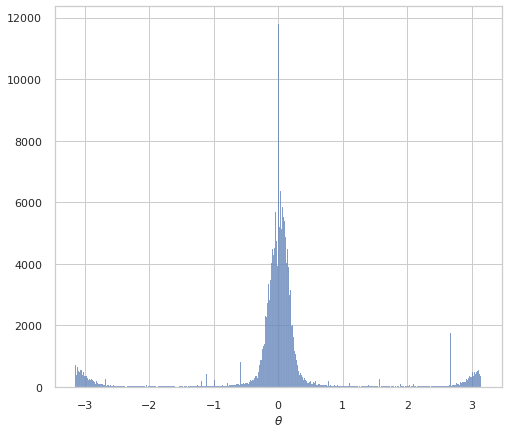

In [95]:
p = sns.histplot(angles, binwidth=0.01)
#p.set_ylim(0.8,10000)
#p.set_yscale('log')
plt.xlabel(r'$\theta$')
plt.ylabel('')
#plt.title('Distribution of direction taken by fish in one time step (0.04s)')

/home/sultannazir/miniconda3/envs/tracking/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


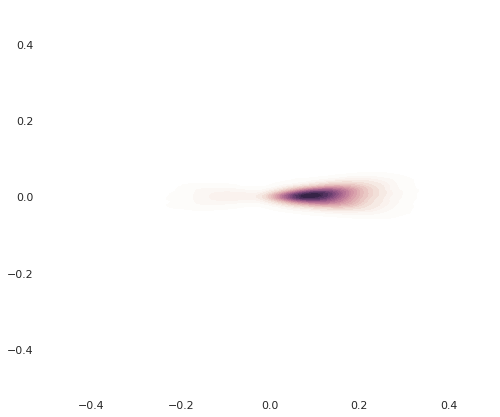

In [69]:
cmap = sns.cubehelix_palette(start=3, light=1, as_cmap=True)
k = sns.kdeplot(xx,yy,thresh=0, clip=(-0.5,0.5), levels=25, cmap=cmap, fill=True)
k.grid()

<ipython-input-231-383b66335b6d>:8: UserWarning: The following kwargs were not used by contour: 'fill'
  cset = ax.contour(xxx, yyy, density, 25, cmap=cmap, fill=True)
<ipython-input-231-383b66335b6d>:10: RuntimeWarning: divide by zero encountered in log
  cb.ax.set_yticklabels(map(lambda x: -0.5961573*np.log(float(x.get_text())),


[Text(1, 0.0, 'inf'),
 Text(1, 15.0, '-1.6144238961535506'),
 Text(1, 30.0, '-2.02764864781878'),
 Text(1, 45.0, '-2.269369631912751'),
 Text(1, 60.0, '-2.4408733994840093'),
 Text(1, 75.0, '-2.5739020565479'),
 Text(1, 90.0, '-2.682594383577981'),
 Text(1, 105.0, '-2.7744924366569634'),
 Text(1, 120.0, '-2.854098151149239')]

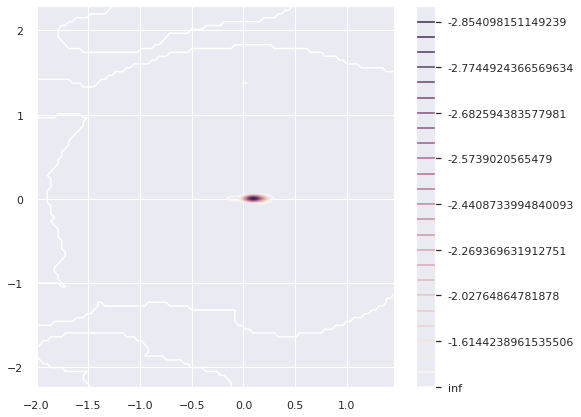

In [231]:
kde = stats.gaussian_kde([xx, yy])

xxx, yyy = np.mgrid[min(xx):max(xx):(max(xx)-min(xx))/100, min(yy):max(yy):(max(yy)-min(yy))/100]
density = kde(np.c_[xxx.flat, yyy.flat].T).reshape(xxx.shape)

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(start=3, light=1, as_cmap=True)
cset = ax.contour(xxx, yyy, density, 25, cmap=cmap, fill=True)
#cb = fig.colorbar(cset)
#cb.ax.set_yticklabels(map(lambda x: -0.5961573*np.log(float(x.get_text())), 
 #                             cb.ax.get_yticklabels()))

In [ ]:
cmap = sns.cubehelix_palette(start=3, light=1, as_cmap=True)
k = sns.kdeplot(dxdat,dydat,thresh=0, clip=(-0.5,0.5), levels=25, cmap=cmap, fill=True)
plt.ylabel('dy')
plt.xlabel('dx')
plt.title('Distribution of steps (vectors) taken by the fish in one time step (0.04s)')

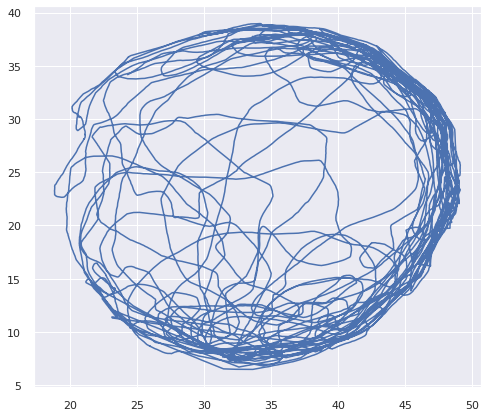

In [193]:

plt.plot(D['X#wcentroid (cm)'],D['Y#wcentroid (cm)'])

In [48]:
N = 15
dat = []
for i in range(N):
    D = pd.read_csv('/home/sultannazir/Videos/data/T25/MVI_0425_fish{}.csv'.format(i))
    dat.append(D)

In [49]:
sns.set_theme()
steps = []
dxdat = []
dydat = []
for i in range(N):
    dx = dat[i]['X#wcentroid (cm)'][1:].values - dat[i]['X#wcentroid (cm)'][:-1].values
    dy = dat[i]['Y#wcentroid (cm)'][1:].values - dat[i]['Y#wcentroid (cm)'][:-1].values
    step = (dx**2 + dy**2)**0.5
    steps = steps + step.tolist()
    dxdat = dxdat + dx.tolist()
    dydat = dydat + dy.tolist()

(0.0, 2.5)

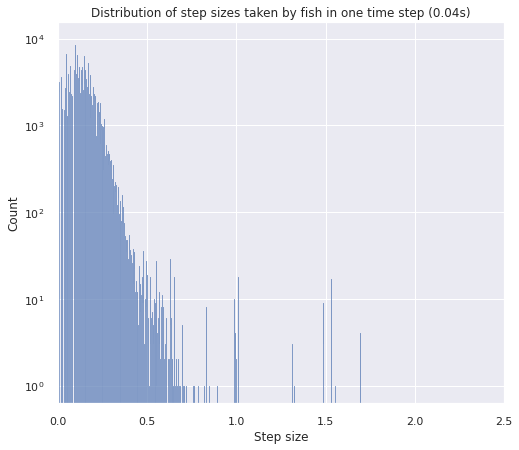

In [51]:
p = sns.histplot(steps)
p.set_yscale('log')
plt.xlabel('Step size')
plt.title('Distribution of step sizes taken by fish in one time step (0.04s)')
plt.xlim([0,2.5])

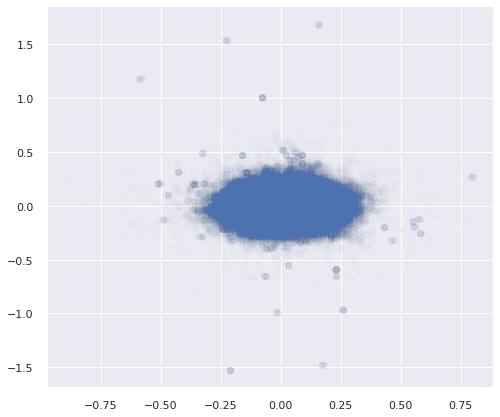

In [28]:
plt.scatter(dxdat,dydat,alpha=0.01)

/home/sultannazir/miniconda3/envs/tracking/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of steps (vectors) taken by the fish in one time step (0.04s)')

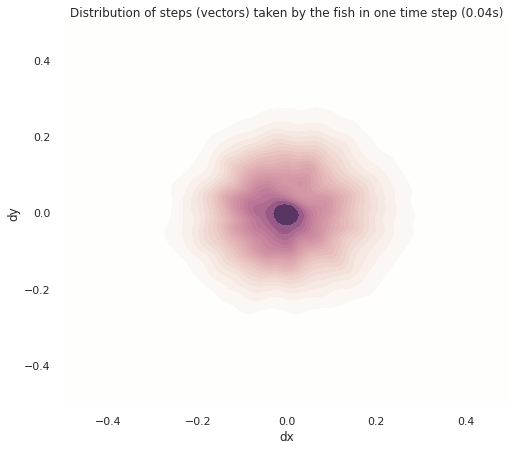

In [30]:
cmap = sns.cubehelix_palette(start=3, light=1, as_cmap=True)
k = sns.kdeplot(dxdat,dydat,thresh=0, clip=(-0.5,0.5), levels=25, cmap=cmap, fill=True)
plt.ylabel('dy')
plt.xlabel('dx')
plt.title('Distribution of steps (vectors) taken by the fish in one time step (0.04s)')

(-2.0, 2.0)

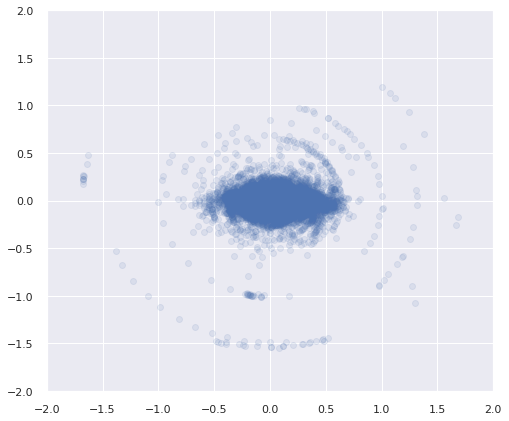

In [36]:
orixdat = []
oriydat = []
for i in range(N):
    orix = dat[i]['X (cm)'][:-1].values - dat[i]['X#wcentroid (cm)'][:-1].values
    oriy = dat[i]['Y (cm)'][:-1].values -  dat[i]['Y#wcentroid (cm)'][:-1].values
    orixdat = orixdat + orix.tolist()
    oriydat = oriydat + oriy.tolist()
#orixu = orix/(orix**2+oriy**2)**0.5
#oriyu = oriy/(orix**2+oriy**2)**0.5

angles = []
xx = []
yy = []
for i in range(len(orixdat)):
    ang = math.atan2(dxdat[i],dydat[i]) - math.atan2(orixdat[i],oriydat[i])
    #ang = angle_bw([dx[i],dy[i]],[orix[i],oriy[i]])
    angles.append(ang)
    xx.append(steps[i]*math.cos(ang))
    yy.append(steps[i]*math.sin(ang))

#sns.histplot(np.array(angles)*180/math.pi)
plt.scatter(xx,yy,alpha=0.1)
plt.xlim([-2,2])
plt.ylim([-2,2])

/home/sultannazir/miniconda3/envs/tracking/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of step vector with respect to orientation of fish (Along +ve X-axis)')

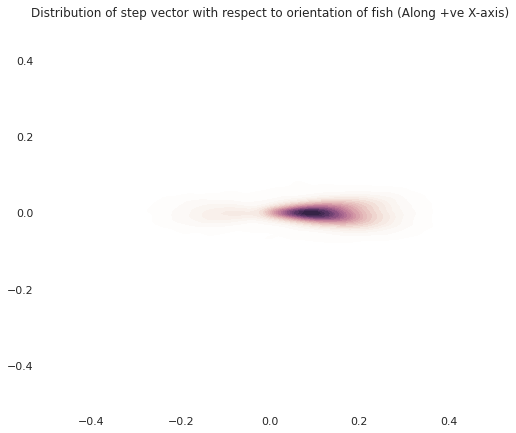

In [31]:
cmap = sns.cubehelix_palette(start=3, light=1, as_cmap=True)
k = sns.kdeplot(xx,yy,thresh=0, clip=(-0.5,0.5), levels=25, cmap=cmap, fill=True)
plt.title('Distribution of step vector with respect to orientation of fish (Along +ve X-axis)')